In [1]:
import shutil
import os

In [2]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
import numpy as np

C:\Phyton\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
# Каталог с данными для обучения
train_dir = 'C:/Users/msu/dogcats/train'
# Каталог с данными для проверки
val_dir = 'C:/Users/msu/dogcats/val'
# Каталог с данными для тестирования
test_dir = 'C:/Users/msu/dogcats/test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 10
# Количество изображений для обучения
nb_train_samples = 400
# Количество изображений для проверки
nb_validation_samples = 400
# Количество изображений для тестирования
nb_test_samples = 400

In [39]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [40]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [41]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 400 images belonging to 2 classes.


In [42]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 400 images belonging to 2 classes.


In [43]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 400 images belonging to 2 classes.


In [44]:
features_train = vgg16_net.predict_generator(
        train_generator, nb_train_samples // batch_size)

In [45]:
np.save(open('features_train.npy', 'wb'), features_train)

In [46]:
features_val = vgg16_net.predict_generator(
        val_generator, nb_validation_samples // batch_size)

In [47]:
np.save(open('features_val.npy', 'wb'), features_val)

In [48]:
features_test = vgg16_net.predict_generator(
        test_generator, nb_test_samples // batch_size)

In [49]:
np.save(open('features_test.npy', 'wb'), features_test)

In [50]:
labels_train =  np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

In [51]:
labels_val =  np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [52]:
labels_test =  np.array(
        [0] * (nb_test_samples // 2) + [1] * (nb_test_samples // 2))

In [53]:
features_train = np.load(open('features_train.npy', 'rb'))
features_val = np.load(open('features_val.npy', 'rb'))
features_test = np.load(open('features_test.npy', 'rb'))

In [54]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(features_train, labels_train,
              epochs=10,
              batch_size=10,
              validation_data=(features_val, labels_val), verbose=2)

Train on 400 samples, validate on 400 samples
Epoch 1/10
 - 6s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3481 - val_acc: 0.8850
Epoch 2/10
 - 6s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3512 - val_acc: 0.8825
Epoch 3/10
 - 6s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3540 - val_acc: 0.8825
Epoch 4/10
 - 8s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.8900
Epoch 5/10
 - 6s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3713 - val_acc: 0.8800
Epoch 6/10
 - 5s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3624 - val_acc: 0.8825
Epoch 7/10
 - 5s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3669 - val_acc: 0.8825
Epoch 8/10
 - 5s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3490 - val_acc: 0.8975
Epoch 9/10
 - 6s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3676 - val_acc: 0.8875
Epoch 10/10
 - 6s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3412 - val_acc: 0.9075


In [59]:
scores = model.evaluate(features_test, labels_test, verbose=1)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

400/400 [==============================] - 0s 588us/step
Аккуратность на тестовых данных: 83.75%


In [106]:
img_path = 'C:/Users/msu/dogcats/dog.jpg'

In [107]:
img = image.load_img(img_path, target_size=(150, 150))

In [64]:
from keras.preprocessing import image

Using TensorFlow backend.


In [71]:
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

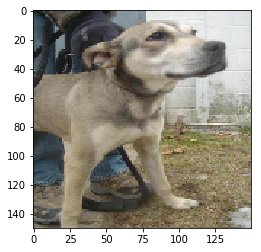

In [109]:
plt.imshow(img)
plt.show()

In [111]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [112]:
homa = vgg16_net.predict(x)

In [113]:
print(model.predict(homa))

[[1.]]


In [114]:
prediction = model.predict(homa)

In [117]:
print(prediction)
print(classes[np.argmax(prediction)])

[[1.]]
кот
